In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
import import_ipynb
import os
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\retina_python\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState

# Load Data and Check Input

In [12]:
dt = 0.01

annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2021\\1103\\SplitData\\diode_repeat_OU_tau=500ms_cutoff=1_mean=10_C=0.2_03-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000

TicTocer = annots['a_data'][1]
startTime = np.where(TicTocer>38000)[0][0]/sampling_rate
endTime = np.where(TicTocer>38000)[0][-1]/sampling_rate
x = annots['a_data'][0, int(startTime*sampling_rate):int(endTime*sampling_rate)+1]
x = x[::int(sampling_rate*dt)]
x = x.astype(float)
x = (x-np.mean(x))/np.std(x)
T = np.arange(len(x))*dt

Spike_Cell = [0]*60
for channelnumber in np.arange(1,61):
    Spike = annots['Spikes'][channelnumber-1]
    Spike_Cell[channelnumber-1] = Spike[np.where(Spike>startTime)[0][0]:np.where(Spike<endTime)[0][-1]]-startTime

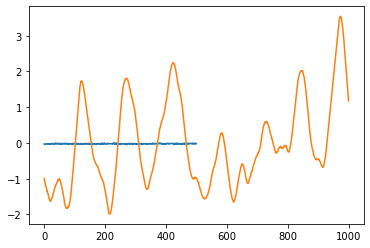

In [13]:
restTime = 5
stiTime = 10
trial = 20

plt.plot(x[:int(restTime/dt)])
plt.plot(x[int(restTime/dt):int((restTime+stiTime)/dt)])

sti = x[int(restTime/dt):int((restTime+stiTime)/dt)]
xstate, _= EqualState(sti, 6)

In [14]:
trial = 20
x_trial = [0]*trial
delayCorrection = [0]*trial
for i in range(trial):
    startTime = restTime+i*(restTime+stiTime)
    endTime = (i+1)*(restTime+stiTime)
    x_trial[i] = x[int(startTime/dt):int(endTime/dt)]
    if i == 0:
        center = np.argmax(np.correlate(x_trial[0], x_trial[0], 'same'))
    else:
        delayCorrection[i] = np.argmax(np.correlate(x_trial[i], x_trial[0], 'same'))-center

## Cut Trial (Stimulus)

In [15]:
# for ci in range(60):
#     Spike = Spike_Cell[ci]

#     Spike_Trial = [0]*trial
#     rstate_Trial = [0]*trial
#     for i in range(trial):
#         startTime = restTime+i*(restTime+stiTime)+delayCorrection[i]*dt
#         endTime = (i+1)*(restTime+stiTime)+delayCorrection[i]*dt
#         try:
#             Spike_Trial = Spike[np.where(Spike>=startTime)[0][0]:np.where(Spike<endTime)[0][-1]]-startTime
#             rstate_Trial[i], _ = np.histogram(Spike_Trial, np.arange(0,stiTime+dt,dt))
#         except: # if there is no spike
#             rstate_Trial[i] = np.zeros(int(stiTime/dt)+1)


In [16]:
ci = 37

Spike = Spike_Cell[ci]

Spike_Trial = [0]*trial
rstate_Trial = [0]*trial
for i in range(trial):
    startTime = restTime+i*(restTime+stiTime)+delayCorrection[i]*dt
    endTime = (i+1)*(restTime+stiTime)+delayCorrection[i]*dt
    try:
        Spike_Trial = Spike[np.where(Spike>=startTime)[0][0]:np.where(Spike<endTime)[0][-1]]-startTime
        rstate_Trial[i], _ = np.histogram(Spike_Trial, np.arange(0,stiTime+dt,dt))
    except: # if there is no spike
        rstate_Trial[i] = np.zeros(int(stiTime/dt)+1)


In [17]:
window = [-1,1]

Information_trial = [0]*trial
for ti in range(trial):
    timeshift, Information_trial[ti] = MIfunc(rstate_Trial[ti], xstate, dt, window, perSpike = True)

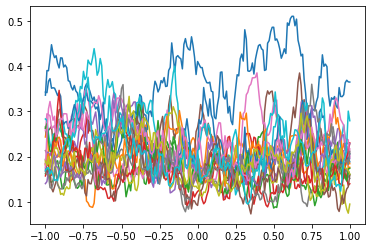

In [18]:
for ti in range(trial):
    plt.plot(timeshift, Information_trial[ti])